In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d sunilthite/cat-or-dog-image-classification

 96% 578M/599M [00:07<00:00, 139MB/s]
100% 599M/599M [00:07<00:00, 82.0MB/s]


In [3]:
import zipfile
zip = zipfile.ZipFile('/content/cat-or-dog-image-classification.zip', 'r')
zip.extractall('/content')
zip.close()


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [5]:
#generators (divide data to batches)
#image dataset from directory
# we use 2 generators, one from trading and one for validating data
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)

Found 23650 files belonging to 2 classes.
Found 3863 files belonging to 2 classes.


In [6]:
#Normalise
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds =validation_ds.map(process)

In [7]:
# create CNN layer

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Increased dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Increased dropout for regularization
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Learning rate schedule
initial_learning_rate = 0.001

def lr_schedule(epoch):
    return initial_learning_rate * 0.9 ** epoch

lr_scheduler = LearningRateScheduler(lr_schedule)

optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
740/740 [==============================] - 84s 99ms/step - loss: 2.9442 - accuracy: 0.5252 - val_loss: 0.6881 - val_accuracy: 0.5760
Epoch 2/10
740/740 [==============================] - 74s 99ms/step - loss: 0.7040 - accuracy: 0.5551 - val_loss: 0.6613 - val_accuracy: 0.6435
Epoch 3/10
740/740 [==============================] - 73s 98ms/step - loss: 0.6653 - accuracy: 0.6067 - val_loss: 0.6523 - val_accuracy: 0.6182
Epoch 4/10
740/740 [==============================] - 78s 106ms/step - loss: 0.6157 - accuracy: 0.6641 - val_loss: 0.5677 - val_accuracy: 0.7282
Epoch 5/10
740/740 [==============================] - 75s 100ms/step - loss: 0.5785 - accuracy: 0.7087 - val_loss: 0.7007 - val_accuracy: 0.5734
Epoch 6/10
740/740 [==============================] - 75s 100ms/step - loss: 0.5418 - accuracy: 0.7358 - val_loss: 0.6428 - val_accuracy: 0.6544
Epoch 7/10
740/740 [==============================] - 74s 99ms/step - loss: 0.4832 - accuracy: 0.7721 - val_loss: 0.4258 - val_accura

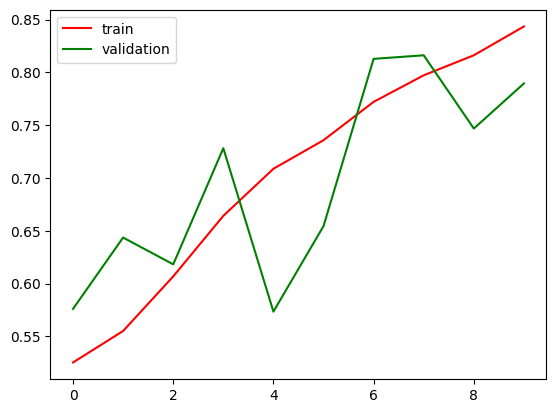

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

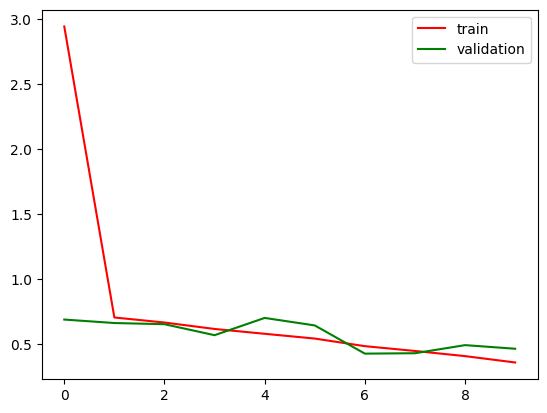

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()